<a href="https://colab.research.google.com/github/handielg/Python/blob/main/Semana_3_Part_6_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las convoluciones van a permitir identificar rasgos, ya no pixel por pixel. En el ejemplo anterior vimos que hay mucho espacio desperdiciado en las imágenes, por lo que sería interesante condensar la imagen a sus características importantes, que hacen que se distinga que es un zapato, o cartera o camisa.

Una **convolución** es tener un filtro y pasarlo sobre la imagen para cambiar la imagen subyacente. Una forma es que cada pixel toma su valor, y mira los valores de sus vecinos, para obtener el nuevo valor para el pixel simplemente multiplicamos cada vecino por el correspondiente valor en el filtro.

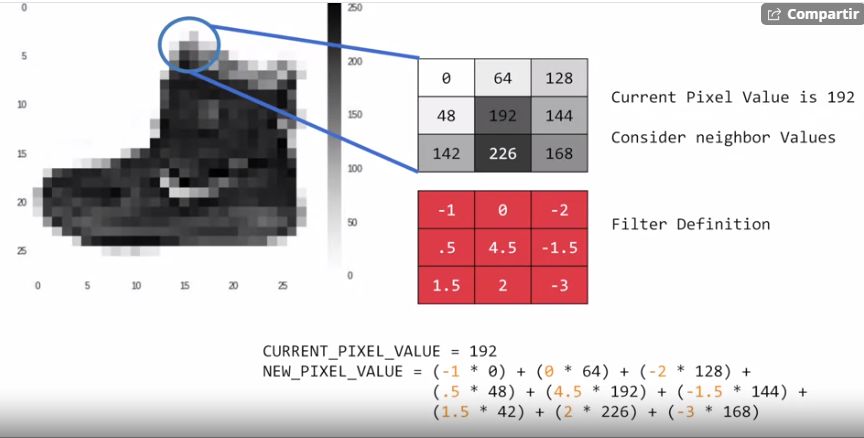

Luego de hacer esto, tenemos el valor del nuevo pixel como la sumatoria de cada una de las multiplicaciones, que en este caso suma 192. Esto es una convolución. La idea aquí es que algunas convoluciones cambiarán la imagen de forma tal que ciertas características de la imagen se enfaticen. Cuando las convoluciones se combinan con pooling son muy potentes. Simplemente el pooling es una forma de comprimir una imagen. Una forma de hacer pooling por ejemplo es seleccionar 4 pixeles a la vez y de estos 4 solo preservar el mayor, asi haremos con toda la imagen, y obtendremos una nueva que solo estará formada por estos pixeles mayores.

[Conv 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

[MaxPooling 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

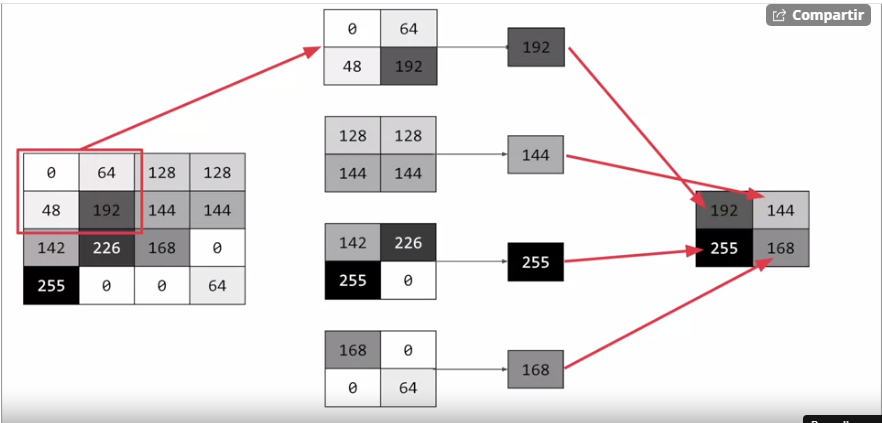

#Mejorando de la precisión de la visión por computadora mediante convoluciones

En las lecciones anteriores, viste cómo hacer el reconocimiento de moda usando una red neuronal profunda (DNN) que contiene tres capas: la capa de entrada (en la forma de los datos), la capa de salida (en la forma de la salida deseada) y una capa oculta. Experimentó con el impacto de diferentes tamaños de capa oculta, número de épocas de entrenamiento, etc. en la precisión final.

Para mayor comodidad, aquí está el código completo nuevamente. Ejecútelo y tome nota de la precisión de la prueba que se imprime al final.

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5038 - accuracy: 0.8215
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8756
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3168 - accuracy: 0.8832
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8764


Tu precisión es probablemente del 89% en el entrenamiento y del 87% en la validación ... no está mal ... Pero, ¿cómo lo haces aún mejor? Una forma es usar algo llamado convoluciones. No voy a detallar aquí las convoluciones, pero el concepto fundamental es que reducen el contenido de la imagen para centrarse en detalles específicos y distintos.

Si alguna vez ha procesado imágenes con un filtro (como este: https://en.wikipedia.org/wiki/Kernel_(image_processing)), las convoluciones le resultarán muy familiares.

En resumen, toma una matriz (generalmente 3x3 o 5x5) y la pasa sobre la imagen. Al cambiar los píxeles subyacentes según la fórmula dentro de esa matriz, puede hacer cosas como la detección de bordes. Entonces, por ejemplo, si observa el enlace anterior, verá un 3x3 que está definido para la detección de bordes donde la celda del medio es 8 y todos sus vecinos son -1. En este caso, para cada píxel, multiplicaría su valor por 8 y luego restaría el valor de cada vecino. Haga esto para cada píxel y obtendrá una nueva imagen con los bordes mejorados.

Esto es perfecto para la visión por computadora, porque a menudo son las características que pueden resaltarse así las que distinguen un elemento de otro, y la cantidad de información necesaria es mucho menor ... porque simplemente entrenará en las características resaltadas.

Ese es el concepto de redes neuronales convolucionales. Agregue algunas capas para hacer la convolución antes de tener las capas densas, y luego la información que va a las capas densas está más enfocada y posiblemente más precisa.

Ejecute el siguiente código: esta es la misma red neuronal que antes, pero esta vez con las capas convolucionales agregadas primero. Tomará más tiempo, pero observe el impacto en la precisión:

In [3]:
#Solicitamos GPU
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0': #esto es lo que nos debe salir si nos asignan GPU.
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #en esta parte le pedimos a keras que nos genere 64 filtros o convoluciones , estos filtros son 3x3 y su activación es relu.
  #con relu, los valores negativos se descartarán, y finalmente la entrada es 28x28 pixeles.El 1 del final indica que estamos usando 1 byte para el color.

  tf.keras.layers.MaxPooling2D(2, 2), #esta línea crea la capa de pooling, es MaxPooling porque vamos a tomar el valor máximo. Es pooling 2x2, de 4 pixeles tomaremos el mayor.

#estas 2 capas a continuació, son para que la red pueda aprender otro conjunto de convoluciones sobre las existentes, y nuevamente hacemos pooling para reducir el tamaño.
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #añadimos otra capa convolucional con 64 convoluciones.

  tf.keras.layers.MaxPooling2D(2,2), #añadimos otra capa de maxpooling.

#En este punto las imágenes han sido divididas por 4 dos veces. Su contenido ha sido simplificado enormemente.
  tf.keras.layers.Flatten(), #a partir de aqui, tenemos las mismas líneas que en la anterior.
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Esta es una tabla que nos muestra las capas, y algunos detalles como la forma de la salida")
model.summary() #esto nos permite inspeccionar las capas del modelo y ver el trayecto de la imágenes a través de las convoluciones.
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.3.0
Esta es una tabla que nos muestra las capas, y algunos detalles como la forma de la salida
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_______________________

Como podemos ver en el resumen del modelo la primera convolución es 26, 26, 64. Como los píxeles de los bordes no pueden entrar en el filtro, el primero que se puede modificar es el de la fila 2, columna 2, que tiene 8 cuadros a su alrededor. Es decir, al usar un filtro, nuestra salida será más pequeña el tamaño del filtro + 1 veces. Es decir si usamos un filtro 3x3, y nuestras imágenes son de 28x28, nuestra salida será 28-3+1 = 26x26, como lo es ahora, hemos quitado un pixel en x y otro en y, es decir los de los bordes.

Lo siguiente es la capa de MaxPooling, como especificamos que fuera de 2x2, transformamos 4 pixeles en 1, por lo que nuestra salida queda reducida de 26x26 a  13x13. 

Las nuevas convoluciones van a trabajar sobre imágenes 13x13, las que al perder el pixel de los bordes tendrían una nueva dimensión de 13-3+1 = 11x11. 

Añadimos otra capa de MaxPooling de 4x4 y al redondearlas a la baja tenemos imágenes de 5x5 pixeles.

Esta red neuronal es igual a la anterior pero está alimentada con imágenes de 5x5 pixeles en vez de 28x28. Hemos especificado 64 convoluciones por imagen, hay 64 nuevas imágenes de 5x5 píxeles que han sido suministradas.

Hacemos aplanado (flatten) y tenemos 25 pixeles por 64 que son 1600, por lo que la capa posterior a flatten tiene 1600 elementos contra los 784 que tenía antes. Este número es afectado por los parámetros que configuramos cuando definimos las capas convolucionales 2D. 

Podemos apreciar que el entrenamiento es más lento por todas las etapas por las que pasan las imágenes. Pero gracias a esto podemos ver que la pérdida y la precisión han mejorado mucho.

Es probable que haya aumentado aproximadamente al 93% en los datos de entrenamiento y al 91% en los datos de validación.

¡Eso es significativo y un paso en la dirección correcta!

Intente ejecutarlo durante más épocas, digamos alrededor de 20, ¡y explore los resultados! Pero si bien los resultados pueden parecer realmente buenos, los resultados de la validación pueden disminuir debido a algo llamado "sobreajuste" que se discutirá más adelante.

(En pocas palabras, el 'sobreajuste' ocurre cuando la red aprende los datos del conjunto de entrenamiento realmente bien, pero es demasiado especializado para solo esos datos y, como resultado, es menos efectivo para ver * otros * datos. Por ejemplo, si todos En tu vida solo viste zapatos rojos, luego, cuando veas un zapato rojo, serías muy bueno para identificarlo, pero los zapatos azules suaves pueden confundirte ... y sabes que nunca debes meterte con mis zapatos de gamuza azul.)

Luego, mire el código nuevamente y vea, paso a paso, cómo se construyeron las convoluciones:

El paso 1 es recopilar los datos. Notarás que hay un pequeño cambio aquí en el sentido de que los datos de entrenamiento deben ser remodelados. Esto se debe a que la primera convolución espera un único tensor que contenga todo, por lo que en lugar de 60.000 elementos de 28x28x1 en una lista, tenemos una única lista 4D que es de 60.000x28x28x1, y lo mismo para las imágenes de prueba. Si no lo hace, obtendrá un error durante el entrenamiento, ya que las convoluciones no reconocen la forma.



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


Lo siguiente es definir su modelo. Ahora, en lugar de la capa de entrada en la parte superior, agregará una convolución. Los parámetros son:

1. El número de convoluciones que desea generar. Puramente arbitrario, pero bueno empezar con algo del orden de 32
2. El tamaño de la convolución, en este caso una cuadrícula de 3x3
3. La función de activación a usar - en este caso usaremos relu, que quizás recuerdes es el equivalente a devolver x cuando x> 0, de lo contrario devolver 0
4. En la primera capa, la forma de los datos de entrada.

Seguirá la convolución con una capa MaxPooling que luego está diseñada para comprimir la imagen, mientras mantiene el contenido de las características que fueron resaltadas por la convolución. Al especificar (2,2) para MaxPooling, el efecto es un cuarto del tamaño de la imagen. Sin entrar en demasiados detalles aquí, la idea es que crea una matriz de píxeles de 2x2 y elige el más grande, convirtiendo así 4 píxeles en 1. Repite esto en la imagen y, al hacerlo, reduce a la mitad el número de píxeles horizontales, y reduce a la mitad el número de píxeles verticales, reduciendo efectivamente la imagen en un 25%.

Puede llamar a model.summary () para ver el tamaño y la forma de la red, y notará que después de cada capa de MaxPooling, el tamaño de la imagen se reduce de esta manera.

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Agregamos otra convolución



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```


Las mismas 128 capas densas y 10 capas de salida que en el ejemplo anterior a la convolución:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


Ahora compilamos el modelo, llame al método de ajuste para realizar el entrenamiento y evalúe la pérdida y la precisión del conjunto de prueba.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualización de convoluciones y agrupación

Este código nos mostrará las convoluciones gráficamente. La impresión (test_labels [; 100]) nos muestra las primeras 100 etiquetas en el conjunto de prueba, y puede ver que las del índice 0, el índice 23 y el índice 28 son todas del mismo valor (9). Todos son zapatos. Echemos un vistazo al resultado de ejecutar la convolución en cada uno, y comenzará a ver que surgen características comunes entre ellos. Ahora, cuando la DNN se está entrenando con esos datos, está trabajando con mucho menos, y tal vez esté encontrando algo en común entre los zapatos en función de esta combinación de convolución / agrupación.

In [5]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


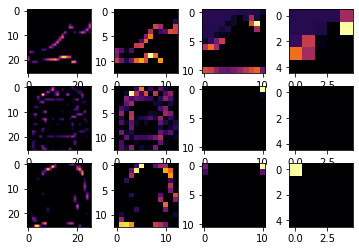

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EJERCICIOS

1. Intente editar las convoluciones. Cambie los 32 a 16 o 64. ¿Qué impacto tendrá esto en la precisión y / o el tiempo de entrenamiento?

2. Elimine la convolución final. ¿Qué impacto tendrá esto en la precisión o el tiempo de entrenamiento?

3. ¿Qué tal agregar más convoluciones? ¿Qué impacto crees que tendrá esto? Experimente con él.

4. Elimine todas las convoluciones excepto la primera. ¿Qué impacto crees que tendrá esto? Experimente con él.

5. En la lección anterior, implementó una devolución de llamada para verificar la función de pérdida y cancelar el entrenamiento una vez que alcanzó una cierta cantidad. ¡Vea si puede implementar eso aquí!

Hecho!

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get("loss")<0.1): #indicamos que valor debe tener la función de pérdida para que pare el entrenamiento.
      print("\n La función de pérdida ha alcanzado el límite indicado")
      self.model.stop_training = True

In [9]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

callbacks = myCallback()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks = [callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.3.0
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1511 - accuracy: 0.9549
Epoch 2/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.0531 - accuracy: 0.9838
 La función de pérdida ha alcanzado el límite indicado
313/313 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9837
0.9836999773979187
